# Importación de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as st

In [3]:
from statsmodels.stats.proportion import proportions_ztest

# Metadata

**client_id**: Every client’s unique ID.

**variation**: Indicates if a client was part of the experiment.

**visitor_id**: A unique ID for each client-device combination.

**visit_id**: A unique ID for each web visit/session.

**process_step**: Marks each step in the digital process.

**date_time**: Timestamp of each web activity.

**clnt_tenure_yr**: Represents how long the client has been with Vanguard, measured in years.

**clnt_tenure_mnth**: Further breaks down the client’s tenure with Vanguard in months.

**clnt_age**: Indicates the age of the client.

**gendr**: Specifies the client’s gender.

**num_accts**: Denotes the number of accounts the client holds with Vanguard.

**bal**: Gives the total balance spread across all accounts for a particular client.

**calls_6_mnth**: Records the number of times the client reached out over a call in the past six months.

**logons_6_mnth**: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.


# EDA & DC: Carga y análisis de los dataframes

In [4]:
# Cargar los archivos .txt
df_final_web_data_pt_1 = pd.read_csv("data/raw/df_final_web_data_pt_1.txt")
df_final_web_data_pt_2 = pd.read_csv("data/raw/df_final_web_data_pt_2.txt")

In [5]:
# Mostrar DataFrame 1
df_final_web_data_pt_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [6]:
# Mostrar DataFrame 2
df_final_web_data_pt_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [7]:
# Concatenación de DataFrames
df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index=True)

In [8]:
# Mostrar resultado de la concatenación
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [9]:
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [10]:
# Exportar la concatenación de DataFrames a un csv
df_final_web_data.to_csv('df_final_web_data.csv', index=False)

In [11]:
# Cargar los archivos .txt en formato csv y los almacena como DataFrames de pandas
df_final_demo = pd.read_csv("data/raw/df_final_demo.txt")
df_final_experiment_clients = pd.read_csv("data/raw/df_final_experiment_clients.txt")

In [12]:
# Mostrar DataFrame "df_final_demo"
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [13]:
# Mostrar DataFrame "df_final_experiment_clients"
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


## Borrado de filas vacías

In [14]:
# Contamos cuántas filas están completamente vacías en cada DataFrame
filas_vacias_demo = df_final_demo.isnull().all(axis=1).sum()
filas_vacias_experiment_clients = df_final_experiment_clients.isnull().all(axis=1).sum()
filas_vacias_web_data = df_final_web_data.isnull().all(axis=1).sum()

# Eliminamos las filas completamente vacías de cada DataFrame
df_final_demo_sin_vacias = df_final_demo.dropna(how='all')
df_final_experiment_clients_sin_vacias = df_final_experiment_clients.dropna(how='all')
df_final_web_data_sin_vacias = df_final_web_data.dropna(how='all')

# Mostramos cuántas filas vacías había en cada DataFrame
print("Filas vacías en df_final_demo:", filas_vacias_demo)
print("Filas vacías en df_final_experiment_clients:", filas_vacias_experiment_clients)
print("Filas vacías en df_final_web_data:", filas_vacias_web_data)

Filas vacías en df_final_demo: 0
Filas vacías en df_final_experiment_clients: 0
Filas vacías en df_final_web_data: 0


## Borrado de NaN

In [15]:
# Contar cuántos valores vacíos (NaN) hay en cada columna del DataFrame
valores_vacios = df_final_experiment_clients.isnull().sum()

# Mostrar los resultados
print("Valores vacíos en df_final_experiment_clients:")
print(valores_vacios)

Valores vacíos en df_final_experiment_clients:
client_id        0
Variation    20109
dtype: int64


In [16]:
# Eliminar filas que tienen cualquier valor vacío
df_final_experiment_clients = df_final_experiment_clients.dropna()

# Mostrar cuántas filas quedan después de eliminar las filas con valores vacíos
print("Filas restantes después de eliminar las filas vacías:")
print(len(df_final_experiment_clients))

Filas restantes después de eliminar las filas vacías:
50500


# EDA & DC: Merge de DataFrames

In [17]:
# Merge de "df_final_demo" y "df_final_experiment_clients" (Lo ideal hubiera sido hacer merge primero y limpiar después)
df_combined = pd.merge(df_final_experiment_clients, df_final_demo, on='client_id', how='inner')
df_combined

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [18]:
valores_nulos = df_combined.isnull().sum()
valores_nulos

client_id            0
Variation            0
clnt_tenure_yr      12
clnt_tenure_mnth    12
clnt_age            13
gendr               12
num_accts           12
bal                 12
calls_6_mnth        12
logons_6_mnth       12
dtype: int64

In [19]:
filas_con_nulos = df_combined[df_combined.isnull().any(axis=1)]
filas_con_nulos

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
5171,8191345,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7131,5144725,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8902,7616759,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18742,2222915,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19391,5277910,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23678,8412164,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36137,8611797,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36245,355337,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38552,4666211,Control,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
38599,1227228,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Eliminar filas que tienen valores nulos en al menos una columna
df_combined = df_combined.dropna()
df_combined

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [21]:
# Cambiar el nombre de la columna 'Variation' a 'variation'
df_combined = df_combined.rename(columns={'Variation': 'variation'})

# Mostrar las primeras filas del DataFrame
df_combined

,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [22]:
df_combined['gendr'].value_counts()

gendr
U    17280
M    16947
F    16258
X        2
Name: count, dtype: int64

In [23]:
# Eliminar filas donde 'gendr' sea igual a 'X'
df_combined = df_combined[df_combined['gendr'] != 'X']

# Verificar que las filas han sido eliminadas
df_combined

,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [24]:
df_combined['gendr'].value_counts()

gendr
U    17280
M    16947
F    16258
Name: count, dtype: int64

# Client behavior analysis

In [25]:
df_combined.clnt_age.describe()

count    50485.000000
mean        47.320362
std         15.518599
min         17.000000
25%         33.500000
50%         48.000000
75%         59.500000
max         96.000000
Name: clnt_age, dtype: float64

Métricas de edad y antigüedad:
         clnt_age  clnt_tenure_yr
mean    47.320362       12.031891
median  48.000000       11.000000
min     17.000000        2.000000
max     96.000000       55.000000


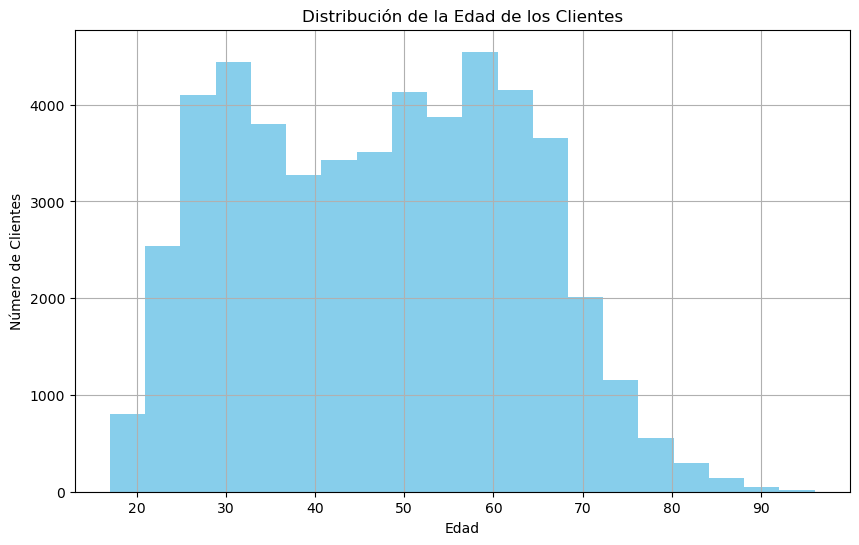

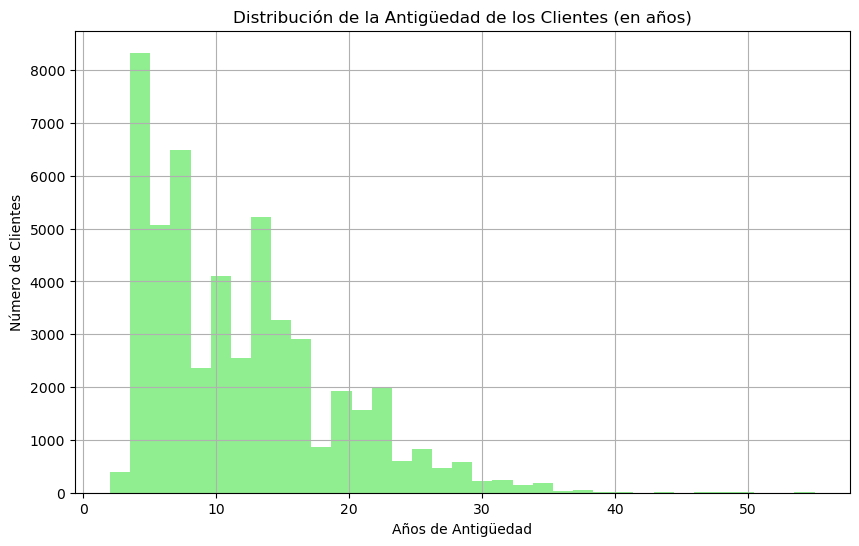

In [26]:
# Calcular métricas de tendencia central para edad y antigüedad
metrics = df_combined.agg({
    'clnt_age': ['mean', 'median', 'min', 'max'],
    'clnt_tenure_yr': ['mean', 'median', 'min', 'max']
})

# Mostrar las métricas
print("Métricas de edad y antigüedad:")
print(metrics)

# Graficar la distribución de la edad
plt.figure(figsize=(10, 6))
df_combined['clnt_age'].hist(bins=20, color='skyblue')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Número de Clientes')
plt.show()

# Graficar la distribución de la antigüedad del cliente
plt.figure(figsize=(10, 6))
df_combined['clnt_tenure_yr'].hist(bins=35, color='lightgreen')
plt.title('Distribución de la Antigüedad de los Clientes (en años)')
plt.xlabel('Años de Antigüedad')
plt.ylabel('Número de Clientes')
plt.show()




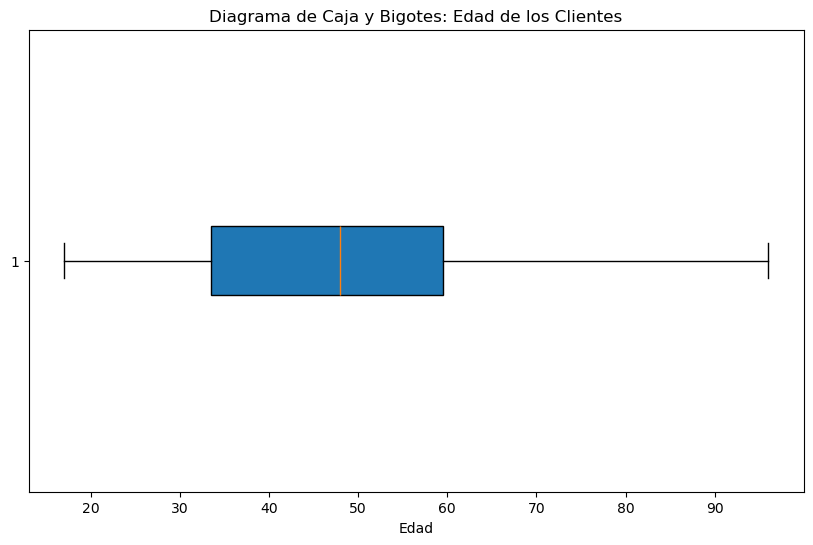

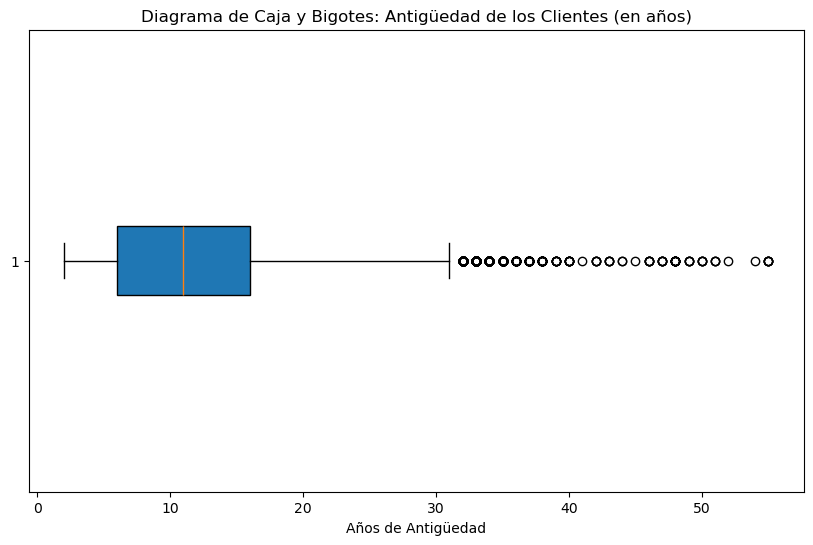

In [27]:
# Crear el boxplot para la distribución de la edad de los clientes
plt.figure(figsize=(10, 6))
plt.boxplot(df_combined['clnt_age'].dropna(), vert=False, patch_artist=True)
plt.title('Diagrama de Caja y Bigotes: Edad de los Clientes')
plt.xlabel('Edad')
plt.show()

# Crear el boxplot para la distribución de la antigüedad de los clientes (en años)
plt.figure(figsize=(10, 6))
plt.boxplot(df_combined['clnt_tenure_yr'].dropna(), vert=False, patch_artist=True)
plt.title('Diagrama de Caja y Bigotes: Antigüedad de los Clientes (en años)')
plt.xlabel('Años de Antigüedad')
plt.show()

In [28]:
# Obtener los cuartiles para la edad y la antigüedad
cuartiles_edad = df_combined['clnt_age'].quantile([0.25, 0.5, 0.75])
cuartiles_antiguedad = df_combined['clnt_tenure_yr'].quantile([0.25, 0.5, 0.75])

# Definir el rango intercuartil (25% al 75%) para la edad y la antigüedad
rango_edad_bajo = cuartiles_edad[0.25]
rango_edad_alto = cuartiles_edad[0.75]

rango_antiguedad_bajo = cuartiles_antiguedad[0.25]
rango_antiguedad_alto = cuartiles_antiguedad[0.75]

# Calcular cuántos clientes están en el rango intercuartil de edad
clientes_en_rango_edad = df_combined[(df_combined['clnt_age'] >= rango_edad_bajo) & (df_combined['clnt_age'] <= rango_edad_alto)]
porcentaje_edad = (len(clientes_en_rango_edad) / len(df_combined)) * 100

# Calcular cuántos clientes están en el rango intercuartil de antigüedad
clientes_en_rango_antiguedad = df_combined[(df_combined['clnt_tenure_yr'] >= rango_antiguedad_bajo) & (df_combined['clnt_tenure_yr'] <= rango_antiguedad_alto)]
porcentaje_antiguedad = (len(clientes_en_rango_antiguedad) / len(df_combined)) * 100

# Resultados
print(f"La mayoría de nuestros clientes (aproximadamente {porcentaje_edad:.2f}%) se encuentran en el rango de edad {rango_edad_bajo:.0f}-{rango_edad_alto:.0f} años.")
print(f"La mayoría de nuestros clientes (aproximadamente {porcentaje_antiguedad:.2f}%) tienen una antigüedad de {rango_antiguedad_bajo:.0f}-{rango_antiguedad_alto:.0f} años.")


La mayoría de nuestros clientes (aproximadamente 50.58%) se encuentran en el rango de edad 34-60 años.
La mayoría de nuestros clientes (aproximadamente 61.43%) tienen una antigüedad de 6-16 años.


In [29]:
# Mostrar las columnas del DataFrame df_combined
df_combined


,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


# Performance Metrics

### KPI Completion Rate

In [30]:
df_final_web_data = df_final_web_data.drop_duplicates()
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [31]:
# Contar valores únicos de 'client_id'
unique_client_ids = df_final_web_data['client_id'].nunique()

# Contar valores únicos de 'visitor_id'
unique_visitor_ids = df_final_web_data['visitor_id'].nunique()

# Contar valores únicos de 'visit_id'
unique_visit_ids = df_final_web_data['visit_id'].nunique()

# Resultados
print(f"Valores únicos de client_id: {unique_client_ids}")
print(f"Valores únicos de visitor_id: {unique_visitor_ids}")
print(f"Valores únicos de visit_id: {unique_visit_ids}")

Valores únicos de client_id: 120157
Valores únicos de visitor_id: 130236
Valores únicos de visit_id: 158095


In [32]:
# Filtrar df_final_web_data para quedarse solo con los client_id presentes en df_combined
df_filtered_web_data = df_final_web_data[df_final_web_data['client_id'].isin(df_combined['client_id'])]

# Verificar las primeras filas del DataFrame filtrado
df_filtered_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
637487,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27
637532,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17
637533,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31
637534,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23


In [33]:
# Contar valores únicos de 'client_id'
unique_client_ids = df_filtered_web_data['client_id'].nunique()

# Contar valores únicos de 'visitor_id'
unique_visitor_ids = df_filtered_web_data['visitor_id'].nunique()

# Contar valores únicos de 'visit_id'
unique_visit_ids = df_filtered_web_data['visit_id'].nunique()

# Resultados
print(f"Valores únicos de client_id: {unique_client_ids}")
print(f"Valores únicos de visitor_id: {unique_visitor_ids}")
print(f"Valores únicos de visit_id: {unique_visit_ids}")

Valores únicos de client_id: 50485
Valores únicos de visitor_id: 55992
Valores únicos de visit_id: 69181


In [34]:
"""Opción 1: Usar client_id (por cliente único)
Argumento a favor:
Enfoque centrado en el cliente: Si te interesa saber cuántos clientes únicos completan el proceso, sin importar cuántas veces visitan la página, entonces client_id es la métrica adecuada.
Esto es relevante si lo que importa es si el diseño o la interfaz está ayudando a los clientes únicos a llegar al paso de confirmación, independientemente de cuántas veces lo intenten.
Ejemplo:
Si el cliente A inicia tres sesiones y completa el proceso en la tercera, con client_id contarías este cliente una sola vez. El Completion Rate aquí mide cuántos clientes alcanzan el paso de confirmación.
Opción 2: Usar visit_id (por sesión/visita)
Argumento a favor:
Enfoque centrado en la interacción/sesión: Si te interesa saber el rendimiento por cada visita, es decir, si cada sesión de navegación individualmente lleva a una confirmación, entonces visit_id es la mejor opción.
Esto es relevante si el objetivo es evaluar cómo cada interacción con el sitio o proceso (sesión) lleva al éxito. Esto puede ser importante si quieres medir la efectividad del diseño para cada oportunidad (sesión) que tiene el cliente de completar el proceso.
Ejemplo:
Si el cliente A inicia tres sesiones y solo completa el proceso en una de ellas, contarías una sesión exitosa de tres. El Completion Rate aquí mide cuántas visitas alcanzan la confirmación.
Recomendación:
Usar visit_id (por sesión/visita) es la mejor opción en este caso.
Argumento principal: El proceso que estás analizando es un flujo web, y es común que los usuarios interactúen con la plataforma en múltiples ocasiones (sesiones). El Completion Rate por sesión te dará una medida más precisa de cuántas de esas interacciones realmente terminan en una conversión exitosa.

Ventajas de usar visit_id:
Cada interacción cuenta: Si un cliente necesita varias visitas para completar el proceso, podrías descubrir cuántas sesiones son necesarias en promedio para llegar al final.
Rendimiento del diseño: Si quieres medir la efectividad del diseño o la interfaz en cada visita, el visit_id es el mejor indicador de éxito o fracaso en cada interacción.
Conclusión:
El Completion Rate basado en visit_id te dará una métrica más sensible para entender el rendimiento del proceso en cada visita/sesión, lo que es crucial en un contexto web. Calculando el éxito de cada sesión, puedes identificar cuántas veces un usuario necesita interactuar con la plataforma antes de lograr el éxito, lo cual es valioso para evaluar la efectividad del diseño.

"""

'Opción 1: Usar client_id (por cliente único)\nArgumento a favor:\nEnfoque centrado en el cliente: Si te interesa saber cuántos clientes únicos completan el proceso, sin importar cuántas veces visitan la página, entonces client_id es la métrica adecuada.\nEsto es relevante si lo que importa es si el diseño o la interfaz está ayudando a los clientes únicos a llegar al paso de confirmación, independientemente de cuántas veces lo intenten.\nEjemplo:\nSi el cliente A inicia tres sesiones y completa el proceso en la tercera, con client_id contarías este cliente una sola vez. El Completion Rate aquí mide cuántos clientes alcanzan el paso de confirmación.\nOpción 2: Usar visit_id (por sesión/visita)\nArgumento a favor:\nEnfoque centrado en la interacción/sesión: Si te interesa saber el rendimiento por cada visita, es decir, si cada sesión de navegación individualmente lleva a una confirmación, entonces visit_id es la mejor opción.\nEsto es relevante si el objetivo es evaluar cómo cada interac

In [35]:
# Unir df_filtered_web_data con df_combined usando client_id para obtener el grupo Test o Control
df_filtered_merged = pd.merge(df_filtered_web_data, df_combined[['client_id', 'variation']], on='client_id', how='left')
df_filtered_merged

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
317110,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
317111,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
317112,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
317113,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [36]:
# Paso 1: Filtrar las visitas que han alcanzado el paso 'confirm'
df_confirm_visits = df_filtered_merged[df_filtered_merged['process_step'] == 'confirm']

# Paso 2: Eliminar duplicados basados en 'visit_id' para asegurarnos de que solo contamos una vez por 'visit_id'
df_unique_confirm_visits = df_confirm_visits.drop_duplicates(subset=['visit_id'])

# Paso 3: Calcular el número total de visitas (únicos visit_id) en el grupo Test
total_test_visits = df_filtered_merged[df_filtered_merged['variation'] == 'Test']['visit_id'].nunique()

# Paso 4: Calcular el número de visitas que llegaron a 'confirm' en el grupo Test
test_confirm_visits = df_unique_confirm_visits[df_unique_confirm_visits['variation'] == 'Test']['visit_id'].nunique()

# Paso 5: Calcular el Completion Rate para el grupo Test
completion_rate_test = (test_confirm_visits / total_test_visits) * 100

# Calcular el Completion Rate para el grupo Control
total_control_visits = df_filtered_merged[df_filtered_merged['variation'] == 'Control']['visit_id'].nunique()
control_confirm_visits = df_unique_confirm_visits[df_unique_confirm_visits['variation'] == 'Control']['visit_id'].nunique()
completion_rate_control = (control_confirm_visits / total_control_visits) * 100

# Mostrar el resultado
print("Completion Rate para el grupo Test (basado en visit_id únicos): {:.2f}%".format(completion_rate_test))
print("Completion Rate para el grupo Control (basado en visit_id únicos): {:.2f}%".format(completion_rate_control))


Completion Rate para el grupo Test (basado en visit_id únicos): 58.39%
Completion Rate para el grupo Control (basado en visit_id únicos): 49.70%


### KPI Error Rates

In [37]:
df_filtered_merged

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
317110,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
317111,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
317112,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
317113,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [38]:
df_filtered_merged['previous_step'] = df_filtered_merged.groupby('visit_id')['process_step'].shift(1)
df_filtered_merged.head(50)

,client_id,visitor_id,visit_id,process_step,date_time,variation,previous_step
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,NaN
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,step_3
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,step_2
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,step_3
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,step_2
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,Test,step_3
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,Test,step_2
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,Test,step_1
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,Test,NaN
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43,Test,confirm


In [39]:
# Crear el diccionario de renombrado
step_rename = {
    'start': 0,
    'step_1': 1,
    'step_2': 2,
    'step_3': 3,
    'confirm': 4
}

# Renombrar en las columnas 'process_step' y 'previous_step'
df_filtered_merged['process_step'] = df_filtered_merged['process_step'].replace(step_rename)
df_filtered_merged['previous_step'] = df_filtered_merged['previous_step'].replace(step_rename)

# Mostrar las primeras filas del DataFrame para verificar los cambios
df_filtered_merged.head(30)

/var/folders/lb/xlcp_nw57bz0k682c287nrk00000gn/T/ipykernel_45364/2764643554.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered_merged['process_step'] = df_filtered_merged['process_step'].replace(step_rename)
/var/folders/lb/xlcp_nw57bz0k682c287nrk00000gn/T/ipykernel_45364/2764643554.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered_merged['previous_step'] = df_filtered_merged['previous_step'].replace(step_rename)


,client_id,visitor_id,visit_id,process_step,date_time,variation,previous_step
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,Test,NaN
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,Test,3.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,Test,2.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,Test,3.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,Test,2.0
5,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:17:15,Test,3.0
6,9988021,580560515_7732621733,781255054_21935453173_531117,1,2017-04-17 15:17:01,Test,2.0
7,9988021,580560515_7732621733,781255054_21935453173_531117,0,2017-04-17 15:16:22,Test,1.0
8,8320017,39393514_33118319366,960651974_70596002104_312201,4,2017-04-05 13:10:05,Test,NaN
9,8320017,39393514_33118319366,960651974_70596002104_312201,3,2017-04-05 13:09:43,Test,4.0


In [40]:
df_filtered_merged[df_filtered_merged["process_step"] == 4].sample(30)

,client_id,visitor_id,visit_id,process_step,date_time,variation,previous_step
171177,9287702,3960607_7737551378,843337800_19047059883_893132,4,2017-03-31 19:12:24,Control,NaN
64601,8402635,606523980_75154742672,661536756_44969281095_651068,4,2017-03-31 12:01:32,Test,NaN
300168,3817959,66908031_48299003997,370195716_35250829997_289584,4,2017-05-14 18:08:43,Control,NaN
241071,8305562,225512518_36986164901,575417712_46238015376_581188,4,2017-05-18 16:28:57,Test,NaN
189912,3285638,616524190_46072669003,399298274_36859153696_75999,4,2017-04-01 19:38:08,Test,NaN
87582,4351510,41056525_44049759412,107155014_47962012202_430208,4,2017-04-05 11:51:17,Test,4.0
90563,1115902,490696686_72293388886,13980517_76289303404_406045,4,2017-04-16 19:35:41,Control,NaN
143849,9432135,377458448_86740983578,305656392_96726074439_99170,4,2017-03-30 09:57:44,Control,NaN
30001,372517,602593273_39918407232,170576953_49647691152_61554,4,2017-03-29 13:50:35,Test,4.0
277868,1101457,446212101_83356228039,359036438_31644524316_972732,4,2017-05-30 19:52:05,Control,NaN


In [68]:
# Inicializar la columna is_error con False
df_filtered_merged['is_error'] = True

# Actualizar is_error basado en las condiciones especificadas
df_filtered_merged['is_error'] = (
    ((df_filtered_merged['process_step'] < df_filtered_merged['previous_step']) & 
     (df_filtered_merged['previous_step'].notna())) |
    ((df_filtered_merged['previous_step'].isna()) & 
     (df_filtered_merged['process_step'] != 0))
)

# Mostrar las primeras filas del DataFrame para verificar los cambios
df_filtered_merged[['visit_id', 'process_step', 'previous_step', 'is_error', 'variation']].sample(60)



,visit_id,process_step,previous_step,is_error,variation
186705,317048837_28769247177_167105,0,1.0,True,Test
171537,108343432_22246836068_782936,1,NaN,True,Control
41835,427996211_6072554285_434745,3,4.0,True,Test
193782,718740124_29434330480_96968,2,3.0,True,Control
119210,226948236_68797696432_74013,0,1.0,True,Test
263094,752790160_45610154471_948876,1,3.0,True,Test
199897,24398396_53745907698_833786,0,0.0,False,Test
287599,5765693_25724371872_368208,2,2.0,False,Control
250179,882480126_28588626892_290170,3,4.0,True,Test
101870,443646080_8782302880_374427,2,3.0,True,Test


In [69]:
# Calcular y mostrar la tasa de error del grupo Control
error_rate_control = df_filtered_merged[df_filtered_merged['variation'] == "Control"]

error_rate_control['is_error'].sum() / len(error_rate_control) * 100
                                      



76.11793681752822

In [70]:
# Calcular y mostrar la tasa de error del grupo Test
error_rate_test = df_filtered_merged[df_filtered_merged['variation'] == "Test"]

error_rate_test['is_error'].sum() / len(error_rate_test) * 100
                                      



74.34228032134426

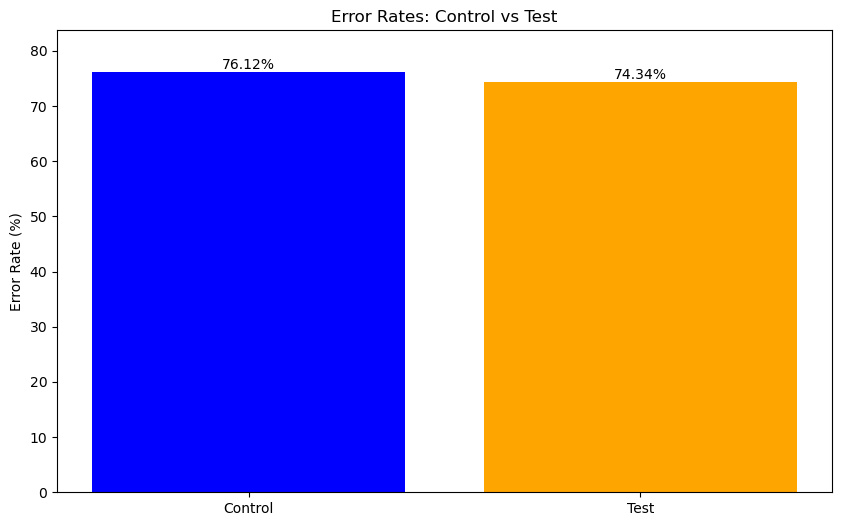

Error rate (Control): 76.12%
Error rate (Test): 74.34%


In [71]:
# Calculate error rates for control and test groups
error_rate_control = (df_filtered_merged[df_filtered_merged['variation'] == 'Control']['is_error'].sum() / 
                      len(df_filtered_merged[df_filtered_merged['variation'] == 'Control'])) * 100

error_rate_test = (df_filtered_merged[df_filtered_merged['variation'] == 'Test']['is_error'].sum() / 
                   len(df_filtered_merged[df_filtered_merged['variation'] == 'Test'])) * 100

# Create the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

groups = ['Control', 'Test']
error_rates = [error_rate_control, error_rate_test]

bars = ax.bar(groups, error_rates, color=['blue', 'orange'])

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom')

# Customize the graph
ax.set_ylabel('Error Rate (%)')
ax.set_title('Error Rates: Control vs Test')
ax.set_ylim(0, max(error_rates) * 1.1)  # Set y-axis limit to 110% of the max value

# Display the graph
plt.show()

# Print the error rates
print(f"Error rate (Control): {error_rate_control:.2f}%")
print(f"Error rate (Test): {error_rate_test:.2f}%")

# Hypothesis Testing

In [46]:
# Calcular el estadístico z y el valor p
counts = np.array([count_test, count_control])
nobs = np.array([nobs_test, nobs_control])

z_stat, p_value = proportions_ztest(counts, nobs)

print(f"Estadístico z: {z_stat}")
print(f"Valor p: {p_value}")

# Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula. La diferencia en las tasas de finalización es estadísticamente significativa.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para concluir que existe una diferencia significativa en las tasas de finalización.")

# Calcular el intervalo de confianza
lower_test, upper_test = proportion_confint(count_test, nobs_test, alpha=0.05, method='normal')
lower_control, upper_control = proportion_confint(count_control, nobs_control, alpha=0.05, method='normal')

print(f"\nIntervalo de confianza del 95% para el grupo de prueba: ({lower_test:.4f}, {upper_test:.4f})")
print(f"Intervalo de confianza del 95% para el grupo de control: ({lower_control:.4f}, {upper_control:.4f})")

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.bar(['Test', 'Control'], [completion_rate_test, completion_rate_control], color=['blue', 'orange'])
plt.title('Completion Rates: Test vs Control')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 100)

for i, rate in enumerate([completion_rate_test, completion_rate_control]):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', va='bottom')

plt.show()


Estadístico z: 22.8952192930478
Valor p: 5.184738386179967e-116
Rechazamos la hipótesis nula. La diferencia en las tasas de finalización es estadísticamente significativa.


NameError: name 'proportion_confint' is not defined

In [45]:
# Realizamos el Two Sample T-test con los recuentos de visitas confirmadas
t_stat, p_value = st.ttest_ind([1]*count_test + [0]*(nobs_test-count_test),
                               [1]*count_control + [0]*(nobs_control-count_control),
                               equal_var=False)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Nivel de significancia = 0.05
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula. La diferencia en las tasas de finalización es estadísticamente significativa.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para concluir que existe una diferencia significativa en las tasas de finalización.")

Estadístico t: 22.95864155790758
Valor p: 3.368598557922218e-116
Rechazamos la hipótesis nula. La diferencia en las tasas de finalización es estadísticamente significativa.


In [104]:
# Establecer la hipótesis

# H0: mu_tasa_finalizacion_test = mu_tasa_finalizacion_control
# H1: mu_tasa_finalizacion_test != mu_tasa_finalizacion_control

# Nivel de significancia = 0.05


In [107]:
print(completion_rate_test)
print(completion_rate_control)

58.38631465517241
49.70013361921631


In [ ]:
st.ttest_ind(df_male,df_female, equal_var=False)

In [105]:
# Realizamos el Two Sample T-test con las tasas de finalización (usamos listas para simular los datos)
t_stat, p_value = st.ttest_ind(completion_rate_test, completion_rate_control, equal_var=False)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Nivel de significancia = 0.05
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula. La diferencia en las tasas de finalización es estadísticamente significativa.")
else:
    print("No podemos rechazar la hipótesis nula.")


Estadístico t: nan
Valor p: nan
No podemos rechazar la hipótesis nula.


/opt/anaconda3/envs/vanguard/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/anaconda3/envs/vanguard/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
